# Field Course Attert 2018
## Positions and Re-Projection

This notebook reads all measured positions and reprojects them to a geographic coordinate system

In [1]:
#load needed modules

#general modules
%pylab inline
import pandas as pd
import seaborn as sns

#geographic modules
import pyproj
import geopandas as gp
import folium
import json

Populating the interactive namespace from numpy and matplotlib


In [3]:
#load recorded data
day1 = pd.read_csv('DAY1.csv')
day2 = pd.read_csv('DAY2.csv')
day3 = pd.read_csv('DAY3.csv')

day1.columns=['PointID', 'East', 'North', 'Elevation', 'Code', 'Date']
day2.columns=['PointID', 'East', 'North', 'Elevation', 'Code', 'Date']
day3.columns=['PointID', 'East', 'North', 'Elevation', 'Code', 'Date']

## Day 1

We will simply do an offset correction based on the triangular centroid of the known stations

Text(0.5,1,'Day 1')

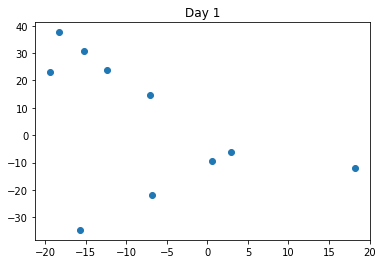

In [4]:
scatter(day1.East,day1.North)
title('Day 1')

In [7]:
day1

,PointID,East,North,Elevation,Code,Date
0,STAT.A,-12.426466,23.803016,479.402497,"\t""""",\t23-05-2018/09:54:44.0
1,STAT_F,-7.041080,14.740034,475.776000,"\t""""",\t23-05-2018/10:03:28.0
2,STAT_B,-18.305832,37.584413,484.601972,"\t""""",\t23-05-2018/10:12:20.0
3,STAT_D,18.173916,-11.813449,466.670748,"\t""""",\t23-05-2018/10:23:20.0
4,STAT_C,2.877192,-5.965952,469.586943,"\t""""",\t23-05-2018/10:33:34.0
5,STAT_C2,0.511880,-9.249280,469.775024,"\t""""",\t23-05-2018/10:38:48.0
6,STAT_E,-15.787432,-34.533820,480.906038,"\t""""",\t23-05-2018/10:46:38.0
7,STAT_G,-6.886332,-21.807620,473.114700,"\t""""",\t23-05-2018/10:52:36.0
8,STAT_Z,-19.367646,23.139650,480.414074,"\t""""",\t23-05-2018/15:08:45.0
9,STAT_Y,-15.191606,30.754630,482.186650,"\t""""",\t23-05-2018/15:13:46.0


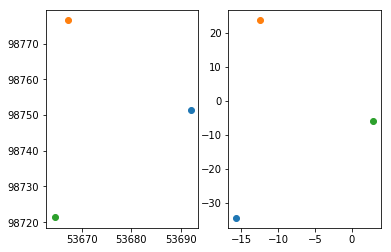

In [14]:
Station_S_A=[53691.99,98751.44]
Station_S_B=[53667.3,98776.51]
Station_S_C=[53664.71,98721.57]

subplot(121)
scatter(Station_S_A[0],Station_S_A[1])
scatter(Station_S_B[0],Station_S_B[1])
scatter(Station_S_C[0],Station_S_C[1])

subplot(122)
scatter(day1[day1.PointID=='STAT_E'].East,day1[day1.PointID=='STAT_E'].North)
scatter(day1[day1.PointID=='STAT.A'].East,day1[day1.PointID=='STAT.A'].North)
scatter(day1[day1.PointID=='STAT_C'].East,day1[day1.PointID=='STAT_C'].North)

In [32]:
#calculating distance for rough check
print('GPS:')
print('A -> B :: '+str(np.round(sum((np.array(Station_S_A)-np.array(Station_S_B))**2)**0.5,1)))
print('A -> C :: '+str(np.round(sum((np.array(Station_S_A)-np.array(Station_S_C))**2)**0.5,1)))
print('B -> C :: '+str(np.round(sum((np.array(Station_S_C)-np.array(Station_S_B))**2)**0.5,1)))

print('')
print('Theodolith:')
print('A -> B :: '+str(np.round(sum((day1.loc[day1.PointID=='STAT_C',['East','North']].values - day1.loc[day1.PointID=='STAT.A',['East','North']].values)**2)**0.5,1)))
print('A -> C :: '+str(np.round(sum((day1.loc[day1.PointID=='STAT_E',['East','North']].values - day1.loc[day1.PointID=='STAT_C',['East','North']].values)**2)**0.5,1)))
print('B -> C :: '+str(np.round(sum((day1.loc[day1.PointID=='STAT_E',['East','North']].values - day1.loc[day1.PointID=='STAT.A',['East','North']].values)**2)**0.5,1)))


GPS:
A -> B :: 35.2
A -> C :: 40.5
B -> C :: 55.0

Theodolith:
A -> B :: 33.5
A -> C :: 34.1
B -> C :: 58.4


In [39]:
#Match the centerpoint of the triangle
def centroid(A,B,C):
    return [(A[0]+B[0]+C[0])/3, (A[1]+B[1]+C[1])/3]

centroid_ref = centroid(Station_S_A,Station_S_B,Station_S_C)
centroid_loc = centroid(day1.loc[day1.PointID=='STAT_C',['East','North']].values[0],day1.loc[day1.PointID=='STAT.A',['East','North']].values[0],day1.loc[day1.PointID=='STAT_E',['East','North']].values[0])

offset = [centroid_ref[0] - centroid_loc[0],centroid_ref[1] - centroid_loc[1]]
offset

[53683.112235333334, 98755.40558533334]

Text(0.5,1,'Day 1')

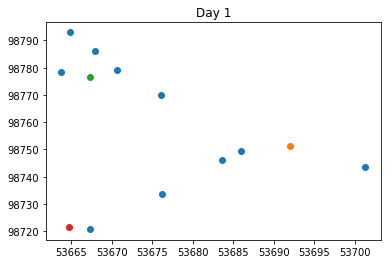

In [41]:
scatter(day1.East+offset[0],day1.North+offset[1])
scatter(Station_S_A[0],Station_S_A[1])
scatter(Station_S_B[0],Station_S_B[1])
scatter(Station_S_C[0],Station_S_C[1])
title('Day 1')


In [50]:
day1_proj = day1[['PointID','East','North','Elevation']].copy()
day1_proj['East']+=offset[0]
day1_proj['North']+=offset[1]
day1_proj

,PointID,East,North,Elevation
0,STAT.A,53670.685769,98779.208601,479.402497
1,STAT_F,53676.071155,98770.145619,475.776000
2,STAT_B,53664.806403,98792.989998,484.601972
3,STAT_D,53701.286151,98743.592136,466.670748
4,STAT_C,53685.989427,98749.439633,469.586943
5,STAT_C2,53683.624115,98746.156305,469.775024
6,STAT_E,53667.324803,98720.871765,480.906038
7,STAT_G,53676.225903,98733.597965,473.114700
8,STAT_Z,53663.744589,98778.545235,480.414074
9,STAT_Y,53667.920629,98786.160215,482.186650


## Day 2

Text(0.5,1,'Day 2')

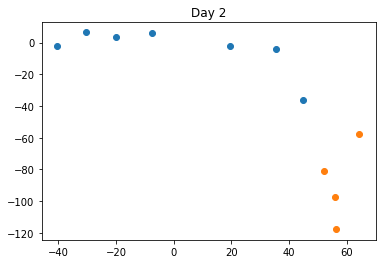

In [5]:
scatter(day2.loc[1:7,'East'],day2.loc[1:7,'North'])
scatter(day2.loc[8:,'East']+50,day2.loc[8:,'North']-50)
title('Day 2')

In [51]:
day2

,PointID,East,North,Elevation,Code,Date
0,M_I,-2.379820,13.430886,200.412582,"\t""""",\t24-05-2018/10:45:32.0
1,D,-7.649863,5.970404,199.627227,"\t""""",\t24-05-2018/10:53:49.0
2,C,-19.946067,3.539241,197.023193,"\t""""",\t24-05-2018/10:57:59.0
3,B,-30.441993,6.514711,195.267187,"\t""""",\t24-05-2018/11:03:06.0
4,A,-40.520823,-2.023604,193.895030,"\t""""",\t24-05-2018/11:12:32.0
5,E,19.638810,-1.890961,201.206764,"\t""""",\t24-05-2018/11:20:09.0
6,F,35.332032,-3.830357,201.838613,"\t""""",\t24-05-2018/11:26:30.0
7,G,44.888158,-36.300289,200.273741,"\t""""",\t24-05-2018/11:31:16.0
8,H,14.133491,-7.538160,199.959463,"\t""""",\t24-05-2018/12:02:09.0
9,I,2.214219,-31.024441,197.792322,"\t""""",\t24-05-2018/12:07:08.0


In [60]:
Station_M_I=[63328.6,90545.2]
Station_M_K=[63383.84,90420.95]

#single point offset correction
offset2 = [Station_M_I[0] - day2.loc[day2.PointID=='M_I','East'].values[0], Station_M_I[1] - day2.loc[day2.PointID=='M_I','North'].values[0]]
offset2

[63330.97982, 90531.769114]

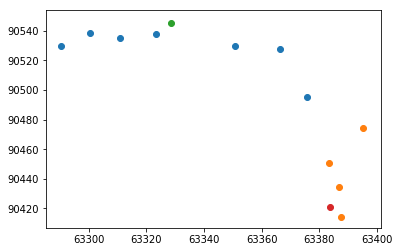

In [64]:
scatter(day2.loc[1:7,'East']+offset2[0],day2.loc[1:7,'North']+offset2[1])
scatter(day2.loc[8:,'East']+50+offset2[0],day2.loc[8:,'North']-50+offset2[1])
scatter(Station_M_I[0],Station_M_I[1])
scatter(Station_M_K[0],Station_M_K[1])

In [66]:
day2_proj = day2[['PointID','East','North','Elevation']].copy()
day2_proj['East']+=offset2[0]
day2_proj['North']+=offset2[1]

elev_M_I=289.3
day2_proj['Elevation']+=89.1

day2_proj

,PointID,East,North,Elevation
0,M_I,63328.600000,90545.200000,289.512582
1,D,63323.329957,90537.739518,288.727227
2,C,63311.033753,90535.308355,286.123193
3,B,63300.537827,90538.283825,284.367187
4,A,63290.458997,90529.745510,282.995030
5,E,63350.618630,90529.878153,290.306764
6,F,63366.311852,90527.938757,290.938613
7,G,63375.867978,90495.468825,289.373741
8,H,63345.113311,90524.230954,289.059463
9,I,63333.194039,90500.744673,286.892322


Text(0.5,1,'Day 3')

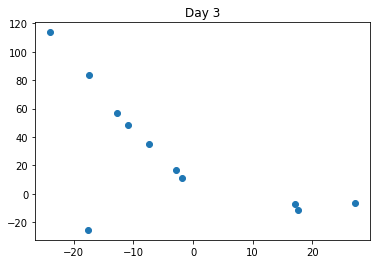

In [6]:
scatter(day3.East,day3.North)
title('Day 3')

In [67]:
day3

,PointID,East,North,Elevation,Code,Date
0,CROSSROAD,-17.569419,-25.476659,321.065338,"\t""""",\t25-05-2018/11:11:53.0
1,SA_G,17.635964,-11.794465,317.734423,"\t""""",\t25-05-2018/11:18:53.0
2,A,-1.883596,10.872507,319.417385,"\t""""",\t25-05-2018/11:34:23.0
3,B,-2.874917,16.621616,319.512139,"\t""""",\t25-05-2018/11:36:34.0
4,C,-7.356489,35.282747,321.980188,"\t""""",\t25-05-2018/11:40:27.0
5,D,-10.915221,48.063924,324.193406,"\t""""",\t25-05-2018/11:45:06.0
6,E,-12.755074,56.691657,326.555105,"\t""""",\t25-05-2018/11:48:10.0
7,E1,-17.383040,83.674354,337.644586,"\t""""",\t25-05-2018/11:52:05.0
8,F,-23.928007,113.702873,348.484229,"\t""""",\t25-05-2018/12:00:16.0
9,SAG1,17.134626,-7.242567,318.028856,"\t""""",\t25-05-2018/15:20:54.0


In [76]:
Crossroad=[60607.5,85908.1]
Station_Sa_G=[60644.87,85918.9]

#two point offset correction
offset3a = [Crossroad[0] - day3.loc[day3.PointID=='CROSSROAD','East'].values[0], Crossroad[1] - day3.loc[day3.PointID=='CROSSROAD','North'].values[0]]
offset3b = [Station_Sa_G[0] - day3.loc[day3.PointID=='SA_G','East'].values[0], Station_Sa_G[1] - day3.loc[day3.PointID=='SA_G','North'].values[0]]
offset3 = [(offset3a[0]+offset3b[0])*0.5,(offset3a[1]+offset3b[1])*0.5]
offset3

[60626.1517275, 85932.13556200001]

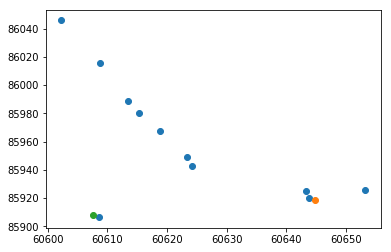

In [78]:
scatter(day3.East+offset3[0],day3.North+offset3[1])
scatter(Station_Sa_G[0],Station_Sa_G[1])
scatter(Crossroad[0],Crossroad[1])

In [79]:
day3_proj = day3[['PointID','East','North','Elevation']].copy()
day3_proj['East']+=offset3[0]
day3_proj['North']+=offset3[1]

elev_crossroad=322.1
#no elevantion correction required

day3_proj

,PointID,East,North,Elevation
0,CROSSROAD,60608.582309,85906.658903,321.065338
1,SA_G,60643.787692,85920.341097,317.734423
2,A,60624.268132,85943.008069,319.417385
3,B,60623.276810,85948.757178,319.512139
4,C,60618.795239,85967.418309,321.980188
5,D,60615.236506,85980.199486,324.193406
6,E,60613.396653,85988.827219,326.555105
7,E1,60608.768687,86015.809916,337.644586
8,F,60602.223720,86045.838435,348.484229
9,SAG1,60643.286353,85924.892995,318.028856


In [101]:
#transform projection to lat/lon
wgs84 = pyproj.Proj('+init=EPSG:4326') #LatLon WGS84
lux1930 = pyproj.Proj('+init=EPSG:2169') #Luxembourg Gauss

dummy = pyproj.transform(lux1930,wgs84,day1_proj.East.values,day1_proj.North.values)
day1_proj['Lat']=dummy[0]
day1_proj['Lon']=dummy[1]
coords_d1 = [tuple(np.array(dummy)[:,i]) for i in np.arange(len(dummy[0]))]

dummy = pyproj.transform(lux1930,wgs84,day2_proj.East.values,day2_proj.North.values)
day2_proj['Lat']=dummy[0]
day2_proj['Lon']=dummy[1]
coords_d2 = [tuple(np.array(dummy)[:,i]) for i in np.arange(len(dummy[0]))]

dummy = pyproj.transform(lux1930,wgs84,day3_proj.East.values,day3_proj.North.values)
day3_proj['Lat']=dummy[0]
day3_proj['Lon']=dummy[1]
coords_d3 = [tuple(np.array(dummy)[:,i]) for i in np.arange(len(dummy[0]))]

In [89]:
#plot map
X_trans = pyproj.transform(lux1930,wgs84, 55000, 95000)
xmap = folium.Map(location=[X_trans[1],X_trans[0]],tiles='Stamen Terrain',zoom_start=11)
from folium.plugins import MarkerCluster
xmap.add_children(MarkerCluster())